In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 14:03:35,592] A new study created in memory with name: no-name-7b50d251-185f-4e0e-9f43-94ac35d5ddb9
[I 2025-04-27 14:04:18,089] Trial 0 finished with value: 0.9614640048396854 and parameters: {'n_estimators': 5638, 'max_depth': 10, 'learning_rate': 0.16508973469770566, 'subsample': 0.7851132130091405, 'colsample_bytree': 0.5705395963625643, 'gamma': 1.5148999069724212, 'reg_alpha': 1.4098666754666887e-07, 'reg_lambda': 0.07717708374592586}. Best is trial 0 with value: 0.9614640048396854.
[I 2025-04-27 14:04:48,375] Trial 1 finished with value: 0.9650937689050212 and parameters: {'n_estimators': 2196, 'max_depth': 14, 'learning_rate': 0.005262118578584034, 'subsample': 0.6211343580696687, 'colsample_bytree': 0.6431266468742414, 'gamma': 1.3417046207092436, 'reg_alpha': 1.9043047092556347e-07, 'reg_lambda': 1.2428596786682196e-08}. Best is trial 1 with value: 0.9650937689050212.
[I 2025-04-27 14:05:00,409] Trial 2 finished with value: 0.9509376890502118 and parameters: {'n_

Best trial:
Accuracy: 0.9790078644888082
Best hyperparameters:  {'n_estimators': 2197, 'max_depth': 14, 'learning_rate': 0.0042160393342206655, 'subsample': 0.8380893382425519, 'colsample_bytree': 0.6771427447770302, 'gamma': 2.299975379600771, 'reg_alpha': 0.007184821575705367, 'reg_lambda': 0.7153320731407866}


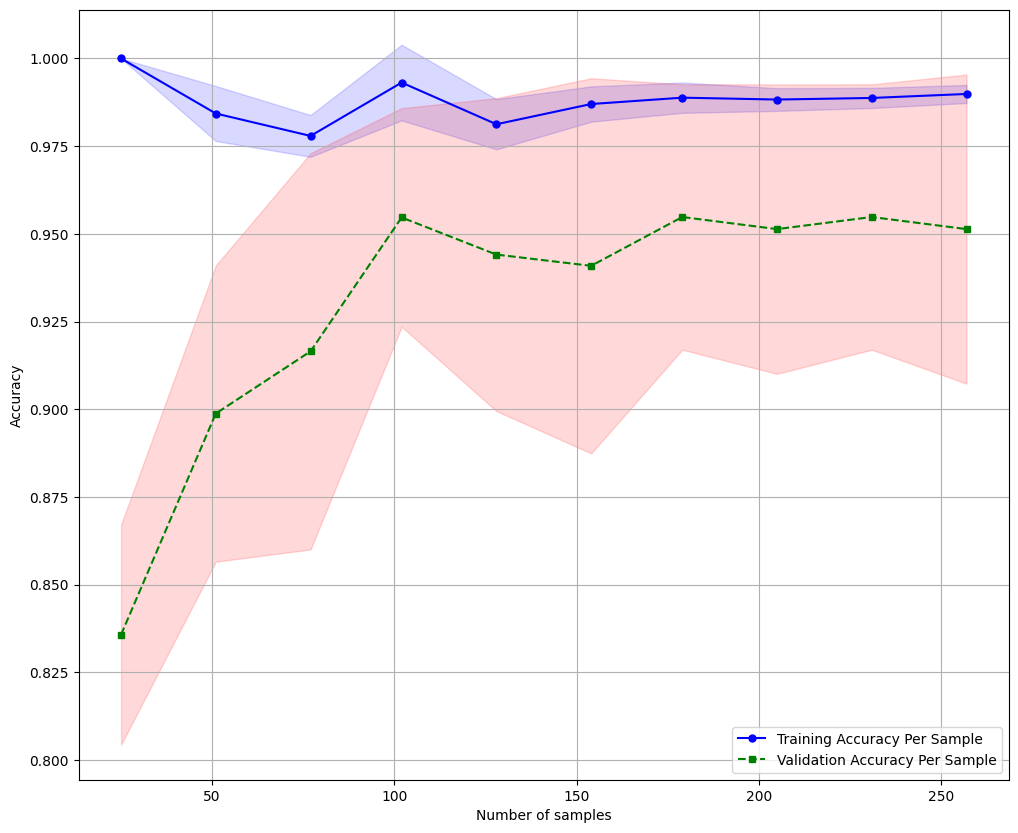

Confusion Matrix
[[ 58   6]
 [  2 105]]
Accuracy: 0.9532, Precision: 0.9459, Recall: 0.9813, F1: 0.9633, AUC: 0.9924


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', outlier_params)

helper.train_and_evaluate_model('xgb', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)